# Recurrent Neural Networks.

- A recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data. (Sequential Modelling).
- These deep learning algorithms are commonly used for ordinal or temporal problems, such as language translation, natural language processing (nlp), speech recognition, and image captioning.
- They are incorporated into popular applications such as Siri, voice search, and Google Translate etc.

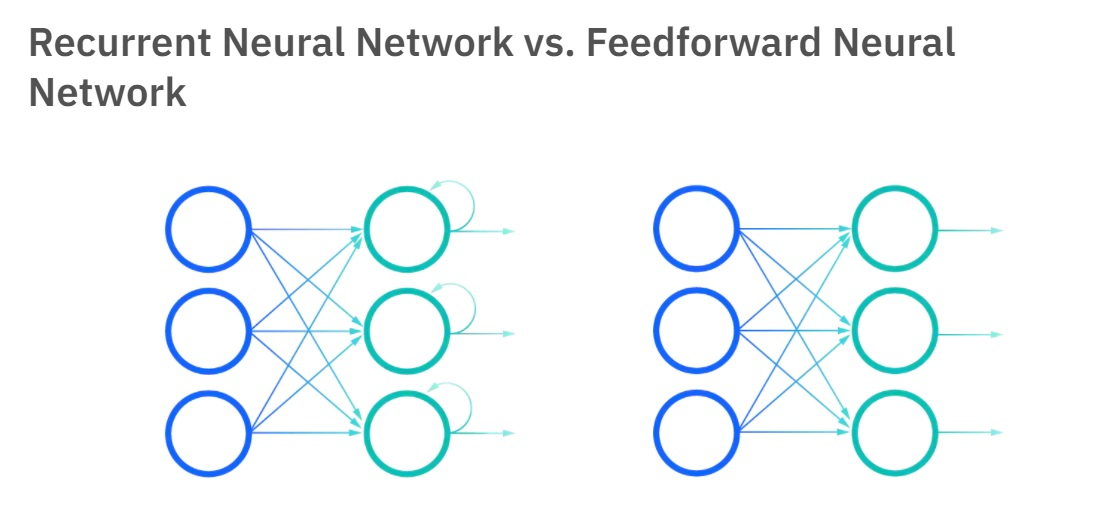

In [1]:
from IPython import display
display.Image("./rnn.jpg")

In [64]:
# standard imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
# import data 
df=pd.read_csv('data/data.csv',parse_dates=True,index_col='DATE')
df.head(2)

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524


In [99]:
# rename the RSCCASN column to sales 
df.columns=['Sales']
df.tail()

,Sales
DATE,
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791
2019-09-01,19695
2019-10-01,21113


<AxesSubplot:xlabel='DATE'>

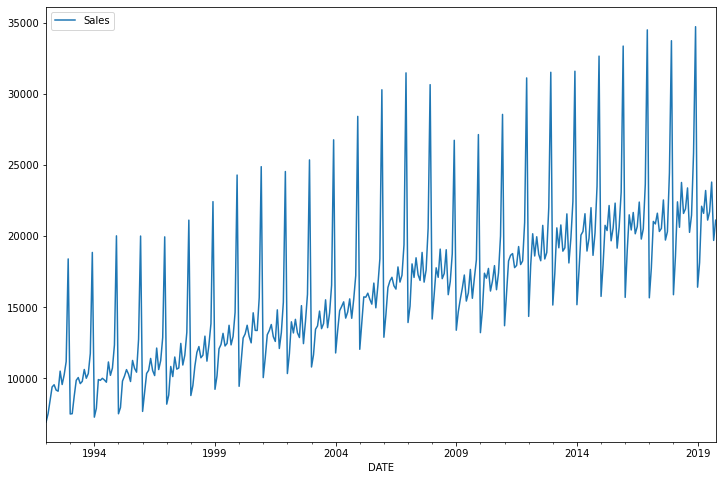

In [100]:
# plot the data 
df.plot(figsize=(12,8))

In [101]:
# check  the first and last date 

df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [69]:
#first date 1992-01-01
#last date  2019-10-01

In [102]:
#total dataframe length
len(df)

334

In [103]:
#Data is monthly, let's forecast 1.5 years into the future.
len(df)-18

316

In [104]:
# test data 
test_size = 18
test_ind = len(df)- test_size

In [106]:
# training & test data 
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]
train.shape

(316, 1)

In [107]:
test.shape

(18, 1)

In [75]:
# scale the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)


array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [108]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# Let's redefine to get 12 months back and then predict the next month out
length = 12

# create an instance of the class and specify the input and output aspects of your time series problem (input,output,length of traning data )
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [109]:

# What does the first batch look like?
X,y = generator[0]

In [110]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266]
Predict this y: 
 [[0.02047633]]


In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [113]:
# We're only using one feature in our time series
n_features = 1
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(100,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [114]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 100)               10200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [117]:
# Stop training when a monitored metric has stopped improving
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)
# fit model
model.fit(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0039 - val_loss: 0.0027
Epoch 2/20
304/304 [==============================] - 3s 10ms/step - loss: 0.0027 - val_loss: 0.0085
Epoch 3/20
304/304 [==============================] - 3s 10ms/step - loss: 0.0046 - val_loss: 0.0018
Epoch 4/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0040 - val_loss: 0.0044
Epoch 5/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0048 - val_loss: 0.0057
Epoch 6/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0055 - val_loss: 0.0044
Epoch 7/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0042 - val_loss: 0.0024
Epoch 8/20
304/304 [==============================] - 3s 8ms/step - loss: 0.0040 - val_loss: 0.0018


<AxesSubplot:>

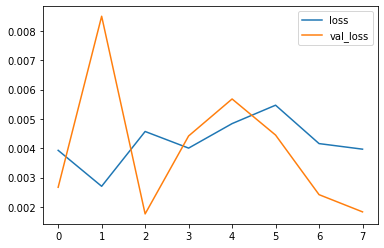

In [118]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [122]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.53252977],
       [0.48591345],
       [0.49364653],
       [0.56629393],
       [0.46405751],
       [0.48536886],
       [0.63534708],
       [0.97233517],
       [0.32468051],
       [0.42285071],
       [0.5615016 ],
       [0.49658728]])

In [123]:
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
current_batch

array([[[0.63077939],
        [0.91095114],
        [0.3213543 ],
        [0.41808423],
        [0.56699717],
        [0.49228722],
        [0.49620789],
        [0.52165449],
        [0.53060097],
        [0.47772893],
        [0.45862851],
        [0.37984431]]])

In [124]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[21168.31102371],
       [20678.4603343 ],
       [21115.08547783],
       [21087.46302843],
       [19653.69783401],
       [18581.84500885],
       [24312.18739605],
       [32029.23813248],
       [15789.38283324],
       [18453.71214128],
       [22555.37006283],
       [20497.55914831],
       [20605.55020189],
       [21306.45118046],
       [21552.87298059],
       [20096.56573319],
       [19570.46355462],
       [17400.43161678]])

In [125]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

<ipython-input-125-53e06c23926f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [88]:
test.head()

,Sales,Predictions
DATE,,
2018-05-01,23764,21414.345371
2018-06-01,21589,18184.275464
2018-07-01,21919,19028.267298
2018-08-01,23381,19169.702447
2018-09-01,20260,17506.260485


<AxesSubplot:xlabel='DATE'>

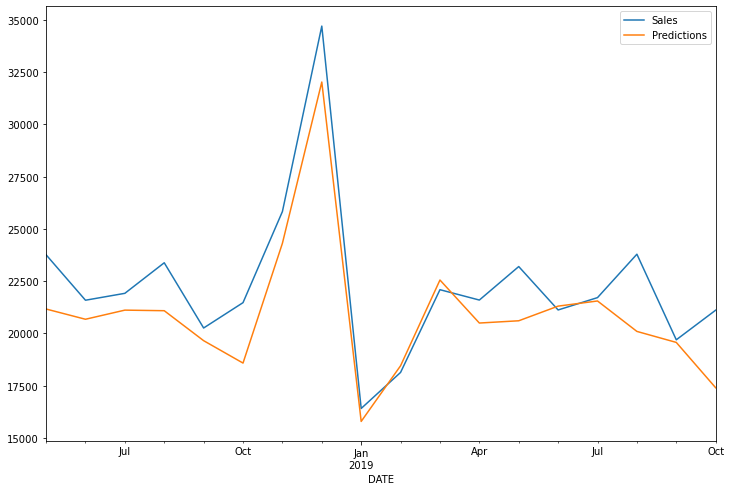

In [126]:
test.plot(figsize=(12,8))

- This kind of RNN suffered from the problem of <b>vanishing & exploding gradients </b>hence unable to model long term dependencies.
- Therefore, LSTM and GRU were developed to solve the problem with traditional RNNS.
- There two architecture use mechanisms known as <b>Gates</b>

In [127]:
#model
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [128]:
# We're only using one feature in our time series
n_features = 1

In [129]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [130]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [131]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [132]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

In [133]:
# fit model
model.fit(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 11s 17ms/step - loss: 0.0264 - val_loss: 0.0097
Epoch 2/20
304/304 [==============================] - 4s 12ms/step - loss: 0.0174 - val_loss: 0.0102
Epoch 3/20
304/304 [==============================] - 4s 13ms/step - loss: 0.0114 - val_loss: 0.0017
Epoch 4/20
304/304 [==============================] - 4s 13ms/step - loss: 0.0045 - val_loss: 0.0114
Epoch 5/20
304/304 [==============================] - 4s 13ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 6/20
304/304 [==============================] - 4s 14ms/step - loss: 0.0020 - val_loss: 0.0036
Epoch 7/20
304/304 [==============================] - 4s 13ms/step - loss: 0.0014 - val_loss: 1.9567e-04
Epoch 8/20
304/304 [==============================] - 5s 15ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/20
304/304 [==============================] - 5s 17ms/step - loss: 0.0019 - val_loss: 5.2966e-04


In [134]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

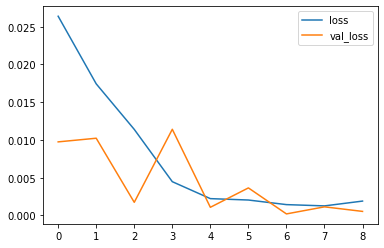

In [135]:
losses.plot()

Evaluate on Test Data¶


In [136]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [137]:
true_predictions = scaler.inverse_transform(test_predictions)

In [138]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

<ipython-input-138-53e06c23926f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [139]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,21709.514022
2018-06-01,21589,20560.183715
2018-07-01,21919,20765.287584
2018-08-01,23381,22622.765556
2018-09-01,20260,20127.263181
2018-10-01,21473,20692.148428
2018-11-01,25831,24587.794592
2018-12-01,34706,34028.996755
2019-01-01,16410,16861.072304


<AxesSubplot:xlabel='DATE'>

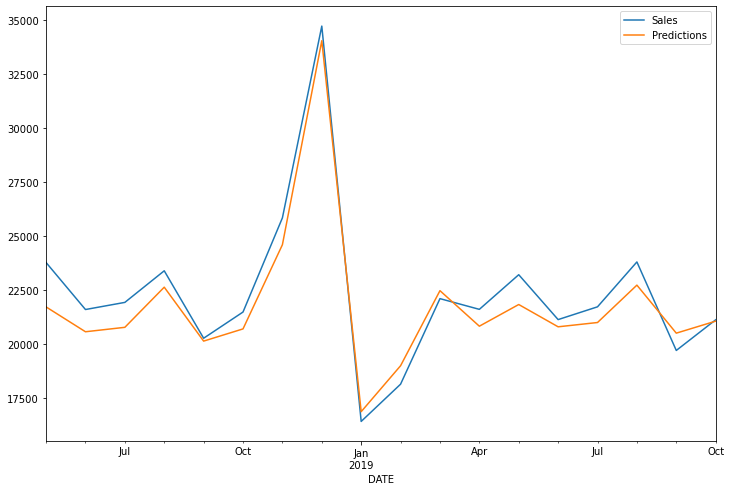

In [140]:
test.plot(figsize=(12,8))

In [141]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [142]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [143]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit(generator,epochs=8)


Epoch 1/8
322/322 [==============================] - 9s 12ms/step - loss: 0.0238
Epoch 2/8
322/322 [==============================] - 4s 11ms/step - loss: 0.0168
Epoch 3/8
322/322 [==============================] - 4s 12ms/step - loss: 0.0108: 0s - loss: 0. - ETA: 0s - loss: 0
Epoch 4/8
322/322 [==============================] - 5s 16ms/step - loss: 0.0052
Epoch 5/8
322/322 [==============================] - 4s 12ms/step - loss: 0.0022
Epoch 6/8
322/322 [==============================] - 4s 12ms/step - loss: 0.0019
Epoch 7/8
322/322 [==============================] - 5s 14ms/step - loss: 0.0027
Epoch 8/8
322/322 [==============================] - 5s 14ms/step - loss: 0.0012


In [144]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [145]:
forecast = scaler.inverse_transform(forecast)

In [146]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [147]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [148]:
forecast_df

,Forecast
2019-11-01,25573.957900
2019-12-01,35513.222788
2020-01-01,16600.333620
2020-02-01,17983.234927
2020-03-01,21367.598172
2020-04-01,20921.569082
2020-05-01,22518.745896
2020-06-01,20604.474035
2020-07-01,21206.957827
2020-08-01,23269.777721


<AxesSubplot:>

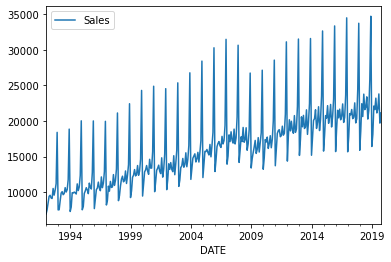

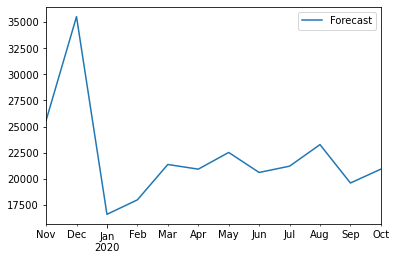

In [149]:
df.plot()
forecast_df.plot()

<AxesSubplot:xlabel='DATE'>

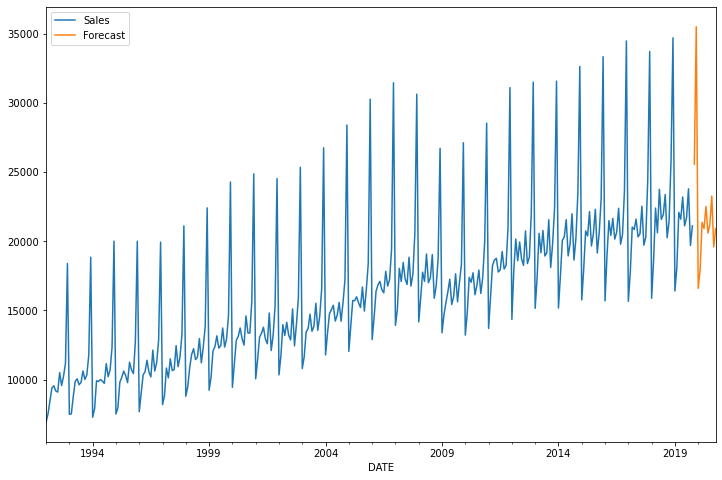

In [155]:
ax = df.plot(figsize=(12,8))
forecast_df.plot(ax=ax)

(576.0, 611.0)

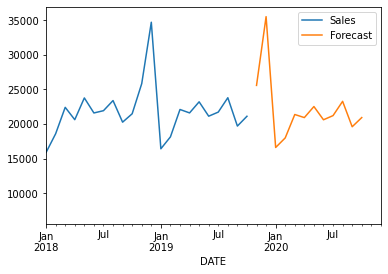

In [156]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')

# END